In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [81]:
# Load data
data = pd.read_csv('beer_production.csv', parse_dates=['Month'], index_col='Month')
data.columns = ['Production']

In [82]:
# Create time series features
def create_time_series_features(data):
    for i in range(1, 13):
        data[f'lag_{i}'] = data['Production'].shift(i)

    # Rolling statistics
    data['rolling_mean'] = data['Production'].rolling(window=12).mean()
    data['rolling_std'] = data['Production'].rolling(window=12).std()

    # Date-based features
    data['month'] = data.index.month
    data['quarter'] = data.index.quarter

    # Trend
    data['trend'] = np.arange(len(data))

    data = data.dropna()
    return data


In [83]:
# Add features to the dataset
data = create_time_series_features(data)

In [84]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [85]:
# Prepare features and target
X_train = train.drop(columns=['Production'])
y_train = train['Production']
X_test = test.drop(columns=['Production'])
y_test = test['Production']

In [86]:
# Initialize and fit Random Forest model
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

In [87]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [88]:
# Make predictions
predictions = model.predict(X_test)

In [89]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [90]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error (MSE): 109.7763
Mean Absolute Error (MAE): 8.5694
R-squared: 0.7765


In [91]:
# Cross-validation (optional, for more robust evaluation)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean():.4f}")

Cross-validated MSE: 119.8728


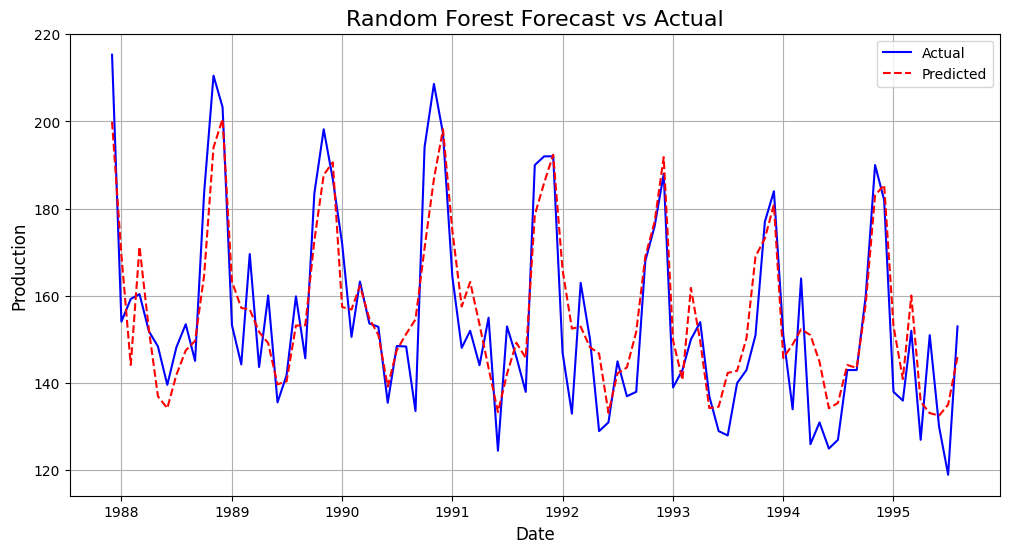

In [92]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='dashed')
plt.title('Random Forest Forecast vs Actual', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()